# 0.0. Imports
---

In [1]:
import numpy  as np
import pandas as pd

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from IPython.core.display import HTML
from IPython.core.interactiveshell import InteractiveShell

## 0.1. Helper Functions

In [23]:
def fractionTTF( df, q ):
    return df['TTF'][q] - df['TTF'].min() / float( df['TTF'].max() - df['TTF'].min() )


def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [35, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

pd.set_option( 'display.float_format', lambda x: '%.5f' % x)

jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading data

In [3]:
df_raw = pd.read_csv( '../data/PM_train.txt', sep=" ", header=None )

# Drop NA Columns
df_raw = df_raw.drop( df_raw.columns[[-1, -2]], axis=1 )

# 1.0. DESCRIÇÃO DOS DADOS
---

## 1.1. Rename Attributes

In [4]:
df1 = df_raw

In [5]:
# new columns name
new_cols = ['asset_id', 'runtime', 'setting01', 'setting02', 'setting03', 
            'tag01', 'tag02', 'tag03', 'tag04', 'tag05', 
            'tag06', 'tag07', 'tag08', 'tag09', 'tag10', 
            'tag11', 'tag12', 'tag13', 'tag14', 'tag15', 
            'tag16', 'tag17', 'tag18', 'tag19', 'tag20', 'tag21'] 

# rename
df1.columns = new_cols

## 1.2. Data Dimensions

In [6]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 20631
Number of Cols: 26


## 1.3. Data Type Attributes

In [7]:
df1.dtypes

asset_id       int64
runtime        int64
setting01    float64
setting02    float64
setting03    float64
tag01        float64
tag02        float64
tag03        float64
tag04        float64
tag05        float64
tag06        float64
tag07        float64
tag08        float64
tag09        float64
tag10        float64
tag11        float64
tag12        float64
tag13        float64
tag14        float64
tag15        float64
tag16        float64
tag17          int64
tag18          int64
tag19        float64
tag20        float64
tag21        float64
dtype: object

## 1.4. Number of NA

In [8]:
df1.isna().sum()

asset_id     0
runtime      0
setting01    0
setting02    0
setting03    0
tag01        0
tag02        0
tag03        0
tag04        0
tag05        0
tag06        0
tag07        0
tag08        0
tag09        0
tag10        0
tag11        0
tag12        0
tag13        0
tag14        0
tag15        0
tag16        0
tag17        0
tag18        0
tag19        0
tag20        0
tag21        0
dtype: int64

## 1.5. Descriptive Statistics

In [9]:
# measure of Central Tendency
ct1 = pd.DataFrame( df1.apply( np.mean ) ).T
ct2 = pd.DataFrame( df1.apply( np.median ) ).T

# dispersion
d1 = pd.DataFrame( df1.apply( np.std ) ).T
d2 = pd.DataFrame( df1.apply( min ) ).T
d3 = pd.DataFrame( df1.apply( max ) ).T
d4 = pd.DataFrame( df1.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( df1.apply( lambda x: x.kurtosis() ) ).T
d6 = pd.DataFrame( df1.apply( lambda x: x.skew() ) ).T

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 
             'standard_deviation', 'kurtosis', 'skew']
m

,attributes,min,max,range,mean,median,standard_deviation,kurtosis,skew
0,asset_id,1.00000,100.00000,99.00000,51.50657,52.00000,29.22692,-1.21982,-0.06782
1,runtime,1.00000,362.00000,361.00000,108.80786,104.00000,68.87932,-0.21854,0.49990
2,setting01,-0.00870,0.00870,0.01740,-0.00001,0.00000,0.00219,-0.00913,-0.02477
3,setting02,-0.00060,0.00060,0.00120,0.00000,0.00000,0.00029,-1.13045,0.00909
4,setting03,100.00000,100.00000,0.00000,100.00000,100.00000,0.00000,0.00000,0.00000
5,tag01,518.67000,518.67000,0.00000,518.67000,518.67000,0.00000,0.00000,0.00000
6,tag02,641.21000,644.53000,3.32000,642.68093,642.64000,0.50004,-0.11204,0.31653
7,tag03,1571.04000,1616.91000,45.87000,1590.52312,1590.10000,6.13100,0.00776,0.30895
8,tag04,1382.25000,1441.49000,59.24000,1408.93378,1408.04000,9.00039,-0.16368,0.44319
9,tag05,14.62000,14.62000,0.00000,14.62000,14.62000,0.00000,0.00000,0.00000


# 2.0. FEATURE ENGINEERING
---

In [10]:
df2 = df1.copy()

## 2.1. FEATURE CREATION

In [11]:
# Max Runtime of each asset
df_max_runtime = df2[['asset_id', 'runtime']].groupby( 'asset_id' ).max().reset_index().rename( columns={'runtime':'max_runtime'} )

# Merge Max Runtime
df2 = pd.merge( df2, df_max_runtime, how='inner', on='asset_id' )

# Determine TTF ( Time To Failure )
df2['TTF'] = df2['max_runtime'] - df2['runtime']

# 3.0. FILTRAGEM DE VARIÁVEIS
---

In [12]:
df3 = df2.copy()

## 3.1. Columns Selection

**Columns to Drop**

**1.setting03:** Equal values for Min and Max and Zero for standard deviation. Sensor might not been working really well.

**2.tag01:** Equal values for Min and Max and Zero for standard deviation. Sensor might not been working really well.

**3.tag05:** Equal values for Min and Max and Zero for standard deviation. Sensor might not been working really well.

**4.tag10:** Equal values for Min and Max and Zero for standard deviation. Sensor might not been working really well.

**5.tag16:** Equal values for Min and Max and Zero for standard deviation. Sensor might not been working really well.

**6.tag18:** Equal values for Min and Max and Zero for standard deviation. Sensor might not been working really well.

**7.tag19:** Equal values for Min and Max and Zero for standard deviation. Sensor might not been working really well.

In [13]:
cols_drop = ['setting03', 'tag01', 'tag05', 'tag10', 'tag16', 'tag18', 
             'tag19']

# drop columns
df3 = df3.drop( cols_drop, axis=1 )

# 4.0. ANALISE EXPLORATORIO DE DADOS
---

In [14]:
df4 = df3.copy()

## 4.1. Analise Univariada

### 4.1.1. Response Variable

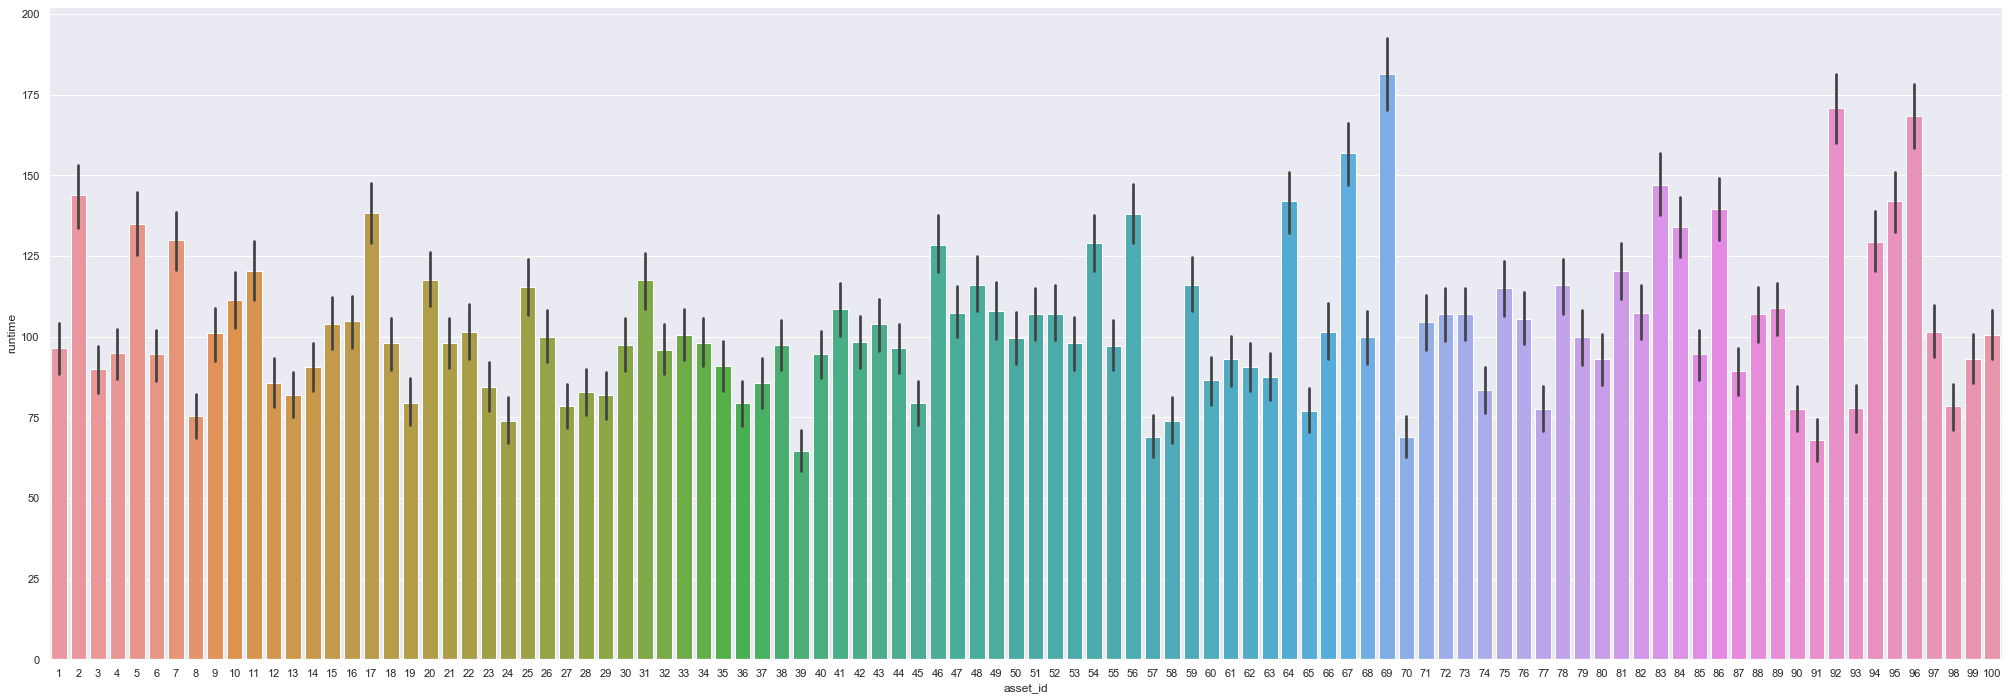

In [15]:
sns.barplot( x='asset_id', y='runtime', data=df3 );

### 4.1.2. Predictor Variables

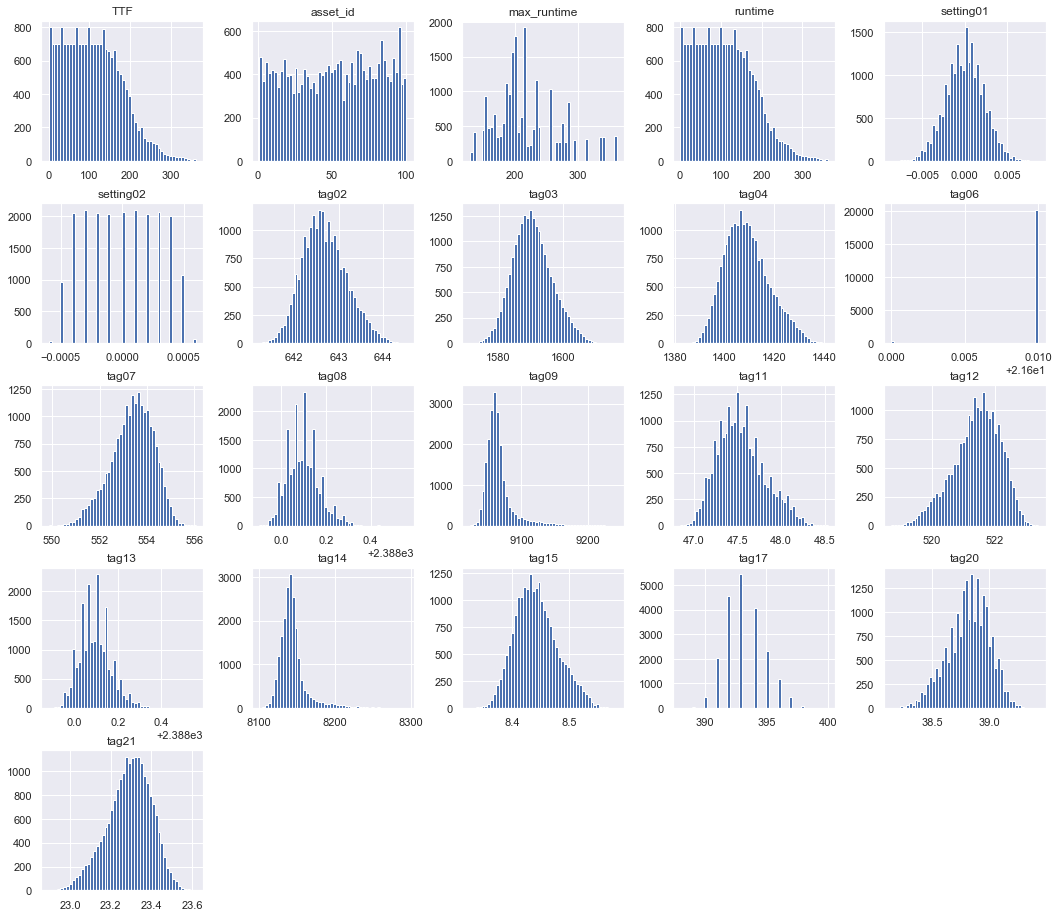

In [16]:
df3.hist( bins=50, figsize=(18, 16) );

# 5.0. DATA PREPARATION
---

In [17]:
df5 = df4.copy()

In [18]:
df5.head()

,asset_id,runtime,setting01,setting02,tag02,tag03,tag04,tag06,tag07,tag08,tag09,tag11,tag12,tag13,tag14,tag15,tag17,tag20,tag21,max_runtime,TTF
0,1,1,-0.00070,-0.00040,641.82000,1589.70000,1400.60000,21.61000,554.36000,2388.06000,9046.19000,47.47000,521.66000,2388.02000,8138.62000,8.41950,392,39.06000,23.41900,192,191
1,1,2,0.00190,-0.00030,642.15000,1591.82000,1403.14000,21.61000,553.75000,2388.04000,9044.07000,47.49000,522.28000,2388.07000,8131.49000,8.43180,392,39.00000,23.42360,192,190
2,1,3,-0.00430,0.00030,642.35000,1587.99000,1404.20000,21.61000,554.26000,2388.08000,9052.94000,47.27000,522.42000,2388.03000,8133.23000,8.41780,390,38.95000,23.34420,192,189
3,1,4,0.00070,0.00000,642.35000,1582.79000,1401.87000,21.61000,554.45000,2388.11000,9049.48000,47.13000,522.86000,2388.08000,8133.83000,8.36820,392,38.88000,23.37390,192,188
4,1,5,-0.00190,-0.00020,642.37000,1582.85000,1406.22000,21.61000,554.00000,2388.06000,9055.15000,47.28000,522.19000,2388.04000,8133.80000,8.42940,393,38.90000,23.40440,192,187


## 5.1. Rescaling

In [20]:
mms = MinMaxScaler()

df5.iloc[:,2:19] = mms.fit_transform( df5.iloc[:,2:19] )

## 5.2. Transformation

In [22]:
fTTFz = []
fTTF = []

for i in range( df5['asset_id'].min(), df5['asset_id'].max()+1 ):
    df = df5[ df5['asset_id'] == i ]
    df = df.reset_index( drop=True )
    
    for q in range( len( df ) ):
        fTTFz = fractionTTF( df, q )
        fTTF.append( fTTFz )
        
df5['fTTF'] = fTTF